## 학습목표
- 데이터셋을 로드하고 EDA 하는 방법에 대해 이해한다.

### 데이터구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

1. 라이브러리 로드

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

2. 데이터로드

In [ ]:
# google drive 마운트 없이, 드라이브에 있는파일 블러오기
url = "https://drive.google.com/file/d/1PG7g9baMKPH1GcMjVxllaKJRs0ixF07B/view?usp=sharing"  # 구글드라이브 공유링크 주소
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]

In [ ]:
df = pd.read_csv(path)
print(df.shape)  # (768, 9)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 확인
df.info()  # 모두 숫자형, 결측치 없음, 메모리사용량 54.1KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 결측치 확인하기
df.isna().sum().sum()  # 결측치 0

0

In [ ]:
# 수치데이터 요약해보기
df.describe()  #include 설정으로 숫자데이터만 가져옴
# 반대로 문자형 데이터가 있을때 inculde = 'object'를 조건으로 넣으면, 문자데이터의 요약정보가 나옴

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### describe 결과 해석하기
- Pregenancies: 평균이 중앙값(50%)보다 높다. 즉, 우측으로 편향된 데이터가 많다. 편차 또한 평균과 거의 유사한 정도인 3.36으로 매우 높다.

- Glucose: 평균이 중앙값보다 높다. 즉 우측편향 데이터다. 최소가 0, 1분위수가 99인 것을 보았을때, 0이 null을 의미하는 것으로 생각됨
- BooldPresure: 혈압에 0이 없음에도, 최소값이 0으로 나옴. 즉 0은 null을 의미
- SkinThickness/BMI: 모두 0이 나올 수 없는 값임에도 0이 나옴. 즉, null값임

In [ ]:
# 학습과 예측에 사용할 컬럼을 만들기
# target하는 값인 outcome을 제외하고 컬럼명들을 feature_names에 할당

feature_names = df.columns[:-1].tolist()
len(feature_names)  # 8개의 변수가 있음
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

3. 결측치 시각화

In [ ]:
# 앞서 describe로 분석해보았을때, 결측치를 0으로 처리해둔 것으로 보이는 columns들을 전처리하고자 함
# 결측치로 보이는 컬럼들을 cols에 저장
cols = feature_names[1:-2]
cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# cols의 컬럼의 값중 0은 null로 가정하고, null로 치환하는 작업을 수행
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
# 컬럼별 데이터 가운데 결측치의 비율확인
df_null.mean() * 100


Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

<Axes: >

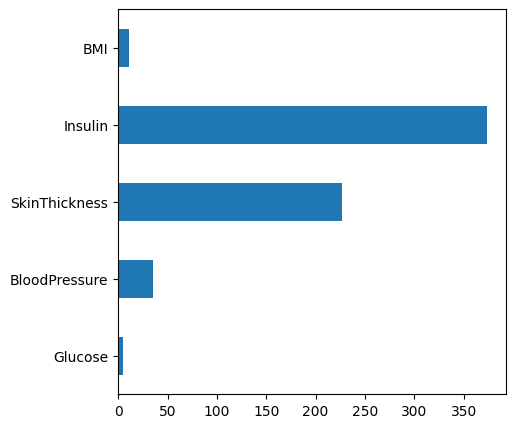

In [ ]:
# 결측치 갯수를 구해 막대그래프로 시각화
plt.figure(figsize=(5,5))
df_null.sum().plot.barh()

<Axes: >

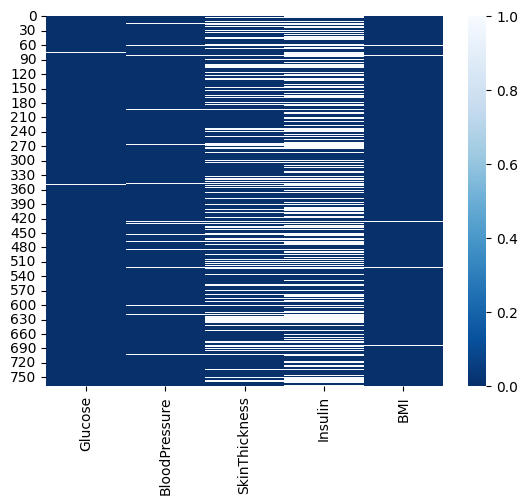

In [ ]:
# 결측치를 heatmap으로 시각화
sns.heatmap(df_null, cmap='Blues_r')
# True값은 파란색, False값은 흰색
#

4. 정답값

In [ ]:
# 정답값인 outcome의 개수를 확인
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# outcome의 비율 확인
df['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# 다른변수와 함께 비교하며 확인하기
# 임신횟수와 정답값을 함께 보기
# 결과를 df_po변수에 저장
df.groupby(['Pregnancies'])['Outcome'].value_counts()  # group을 잡을 항목을 앞에, 값을 뒤에 넣고, 원하는 출력 동작을 입력
df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count'])  #agg([])을 활용하여 여러가지 값을 한번에 확인 할 수 있다.
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index()  # reset_index를 활용하여, pregnancies가 아닌 새롭게 index를 설정할 수 있음
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


Text(0.5, 1.0, 'diabetes corr w pregnancies')

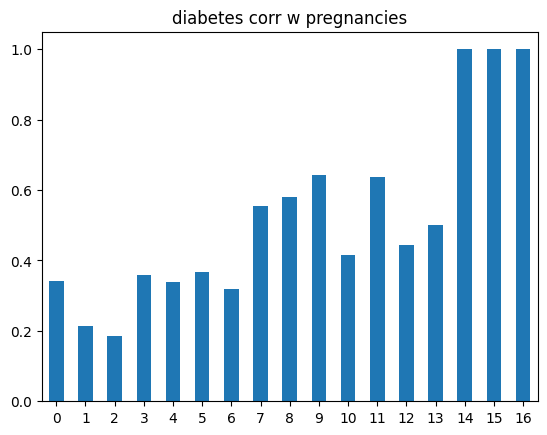

In [ ]:
# 임신 횟수에 따른 당뇨별 발생 비율 확인하기
df_po['mean'].plot.bar(rot=0)
plt.title('diabetes corr w pregnancies')

5. CountPlot

<Axes: xlabel='Outcome', ylabel='count'>

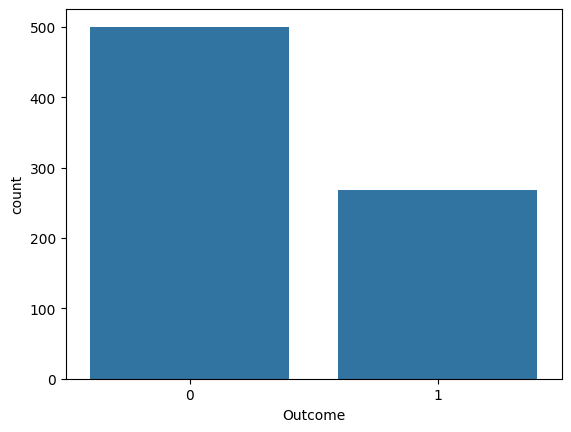

In [ ]:
# 위에서 구했던 당뇨병 발병 비율을 구해본다
# 당뇨병 발병 빈도수를 비교한다

sns.countplot(data = df, x='Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

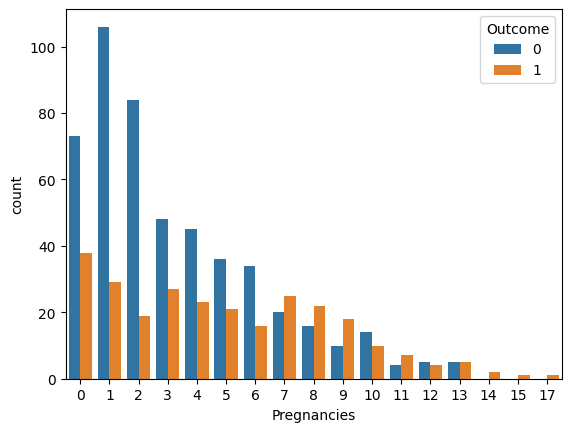

In [ ]:
# 임신 횟수에 따른 당뇨병 발병 빈도수
sns.countplot(data=df, x='Pregnancies', hue="Outcome")

In [ ]:
# pregnancies를 범주화 하고자 함
df['Pregnancies_high'] = df['Pregnancies']>6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

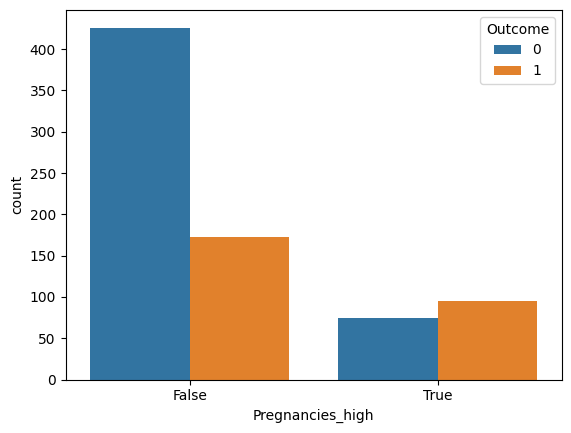

In [ ]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

6. BarPlot

<Axes: xlabel='Outcome', ylabel='BMI'>

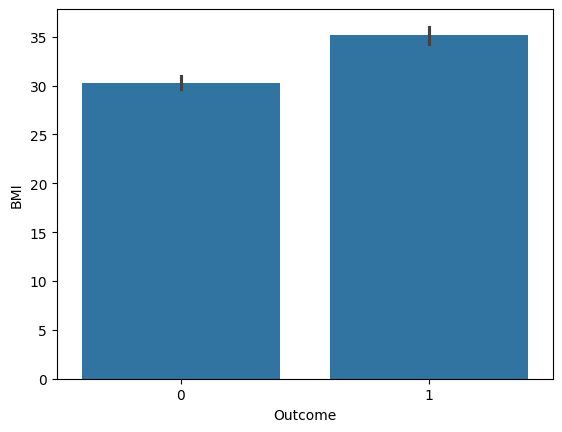

In [ ]:
# 당뇨별 발병에 따른 BMI 수치를 비교

sns.barplot(data=df, x='Outcome', y='BMI')
# 당뇨병 발병환자의 BMI가 더 높다

<Axes: xlabel='Outcome', ylabel='Glucose'>

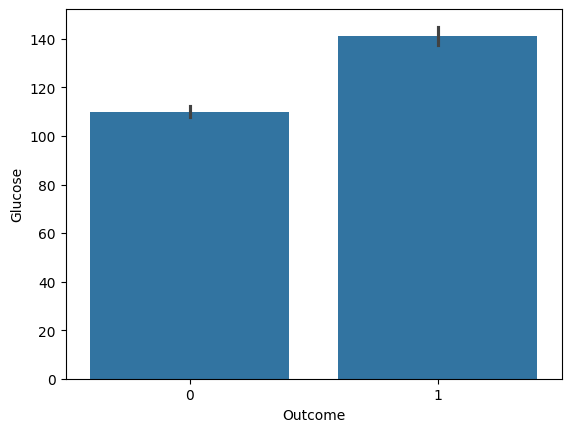

In [ ]:
# 당뇨병 발병에 따른 포도당 수치를 비교(Glucose)
sns.barplot(data=df, x='Outcome', y='Glucose')
# 당뇨병 환자의 Glucose가 약 30정도 더 높다

<Axes: xlabel='Outcome', ylabel='Insulin'>

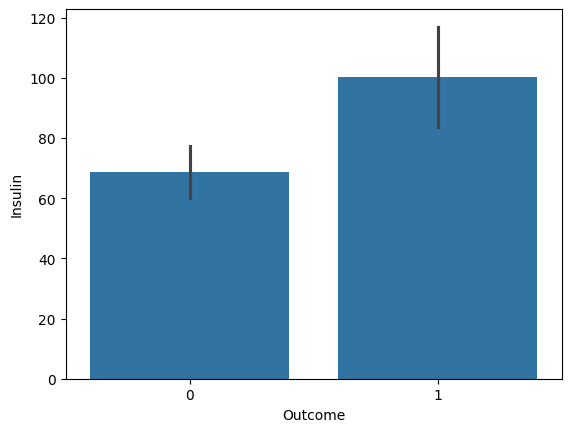

In [ ]:
# insuline 수치가 0이상인 관측치에 대해 당뇨병 발병을 비교
sns.barplot(data=df, x= 'Outcome', y='Insulin')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

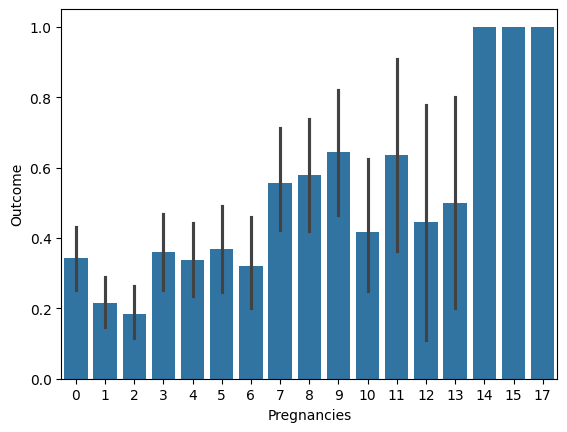

In [ ]:
# 임신 횟수에 대해서 당뇨병 발병 비율을 비교
sns.barplot(data = df, x='Pregnancies', y="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

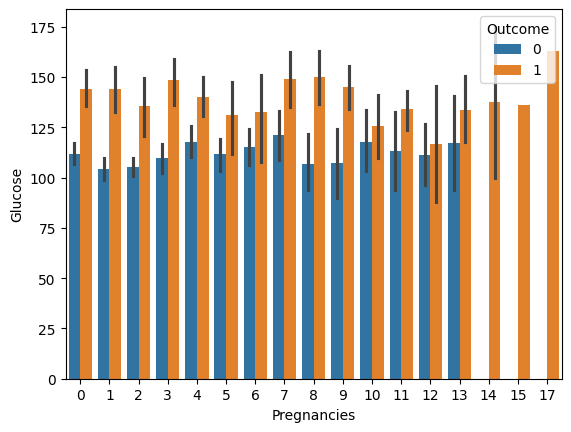

In [ ]:
# 임신횟수(Pregnancies)에 따른 Glucose 수치를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.barplot(data=df, x='Pregnancies', y = 'Glucose', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='BMI'>

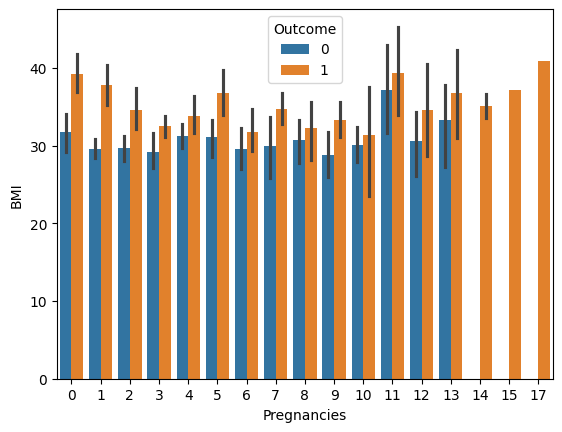

In [ ]:
# Pregnancies에 따른 BMI를 당뇨병 Outcome에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y = 'BMI', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

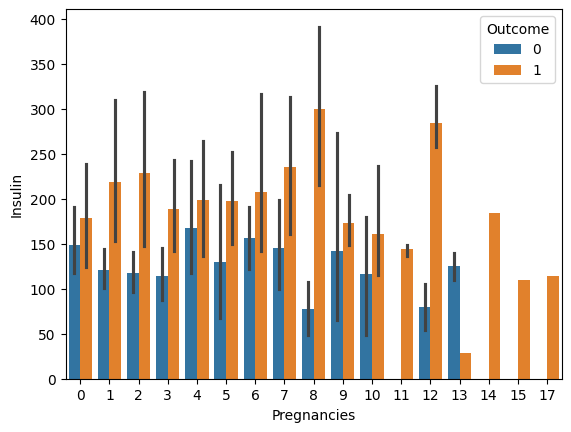

In [ ]:
# Pregnancies에 따른 Insuline수치를 당뇨별 Outcome에 따라 시각화

sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y = 'Insulin', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

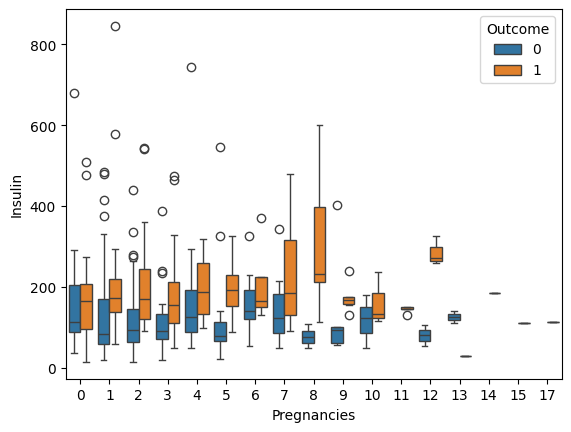

In [ ]:
sns.boxplot(data=df[df['Insulin'] >0], x='Pregnancies', y='Insulin', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

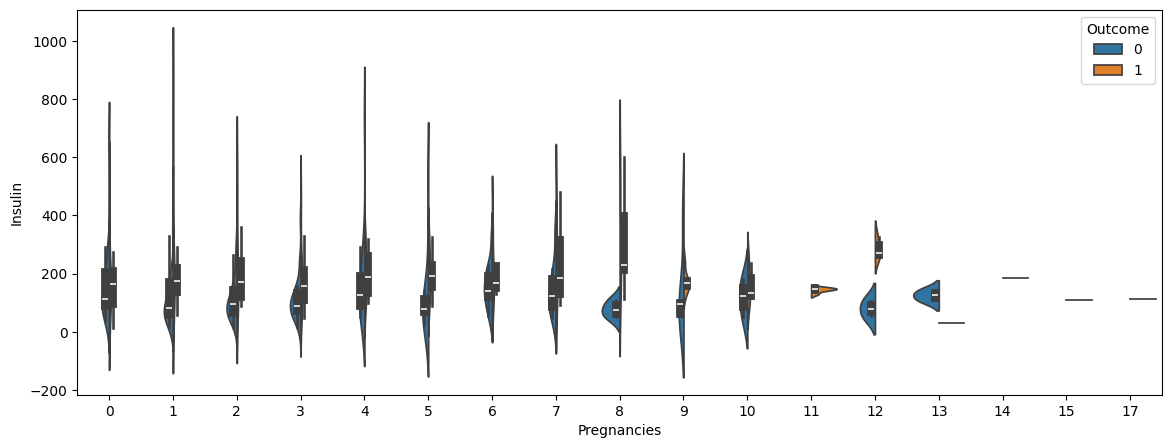

In [ ]:
# 위의 그래프를 바이올린 플롯으로 시각화
plt.figure(figsize=(14,5))
sns.violinplot(data=df[df['Insulin'] >0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


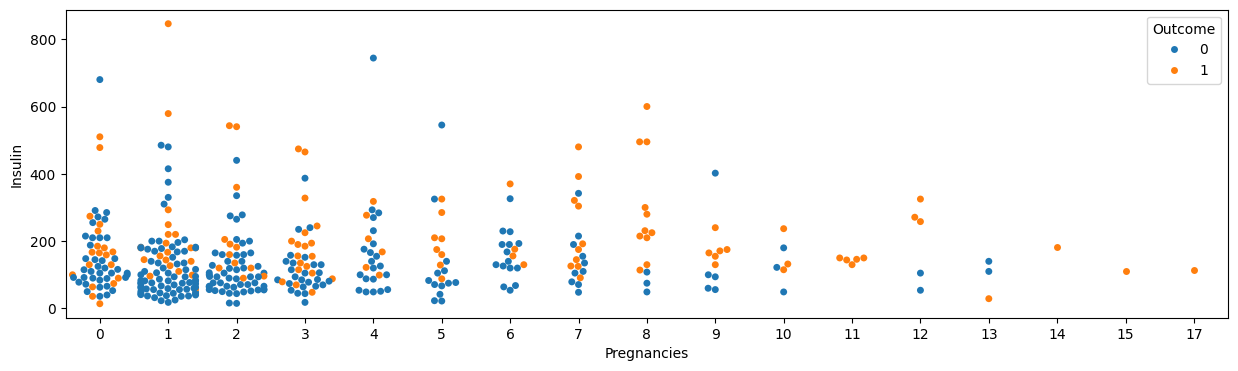

In [ ]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin'] >0], x='Pregnancies', y='Insulin', hue='Outcome')

In [ ]:
# outcome의 결과에 따라 데이터 분리
df_0 = df[df['Outcome'] ==0]  # 당뇨병 미발병 데이터
df_1 = df[df['Outcome']==1]  # 당뇨병 발병 데이터
df.shape, df_0.shape, df_1.shape

((768, 10), (500, 10), (268, 10))

<ipython-input-32-d2fbb3f7eca8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Pregnancies'])  # data=df 를 넣지 않음
<ipython-input-32-d2fbb3f7eca8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

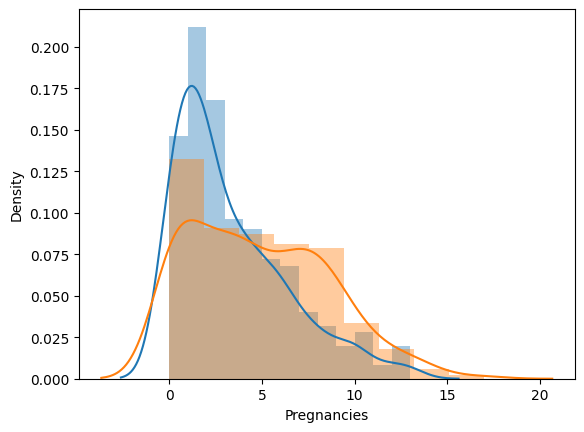

In [ ]:
# distplot 1개의 변수의 결과를 시각화할때 사용

# Pregnancies에 따른 Outcome을 시각화
sns.distplot(df_0['Pregnancies'])  # data=df 를 넣지 않음
sns.distplot(df_1['Pregnancies'])

# 이 그래프를 통해서, 발병했을때와 발병하지 않았을때를 비교할 수 있다.
# 분석 내용으로는, 5명의 출산까지는 발병하지 않은 케이스가 많고, 5명 이후로는 발병한 케이스가 많음을 확인할 수 있음

<ipython-input-33-a5aec266be25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'])  # 파란색
<ipython-input-33-a5aec266be25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Age'])  # 붉은색


<Axes: xlabel='Age', ylabel='Density'>

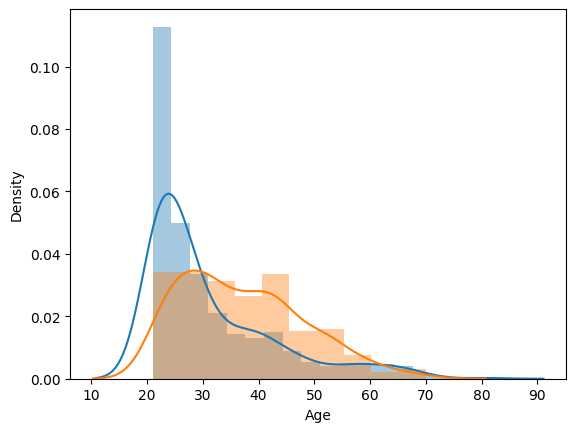

In [ ]:
# distplot을 활용하여, 나이에 따른 당뇨병 발병여부를 시각화
sns.distplot(df_0['Age'])  # 파란색
sns.distplot(df_1['Age'])  # 붉은색

# 분석결과
# 30대가 넘어가면서, 당뇨병 발병 환자가 증가하고 있음

In [ ]:
# df에 Pregnancies_high가 문자형이기 때문에 astype으로 형변환
df['Pregnancies_high'] =  df['Pregnancies_high'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Pregnancies_high          768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>],
       [<Axes: title={'center': 'Pregnancies_high'}>, <Axes: >, <Axes: >]],
      dtype=object)

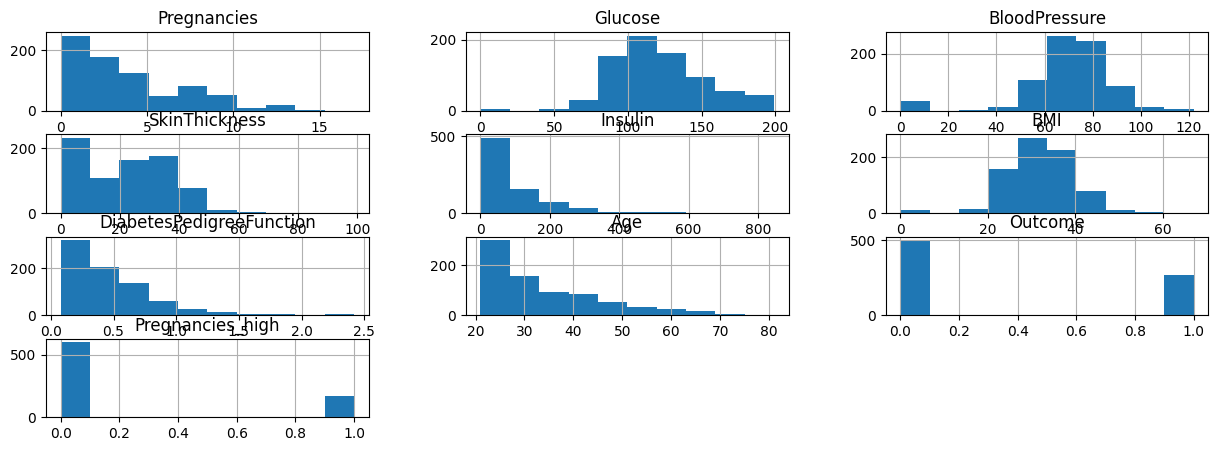

In [ ]:
df.hist(figsize=(15,5))

In [ ]:
# distplot을 for문으로 그래프 그리기

col_num = df.columns[:-1].shape
col_num

cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<ipython-input-37-cecb0f4a42ed>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])
<ipython-input-37-cecb0f4a42ed>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])
<ipython-input-37-cecb0f4a42ed>:10: UserWarning: 

`distplot` 

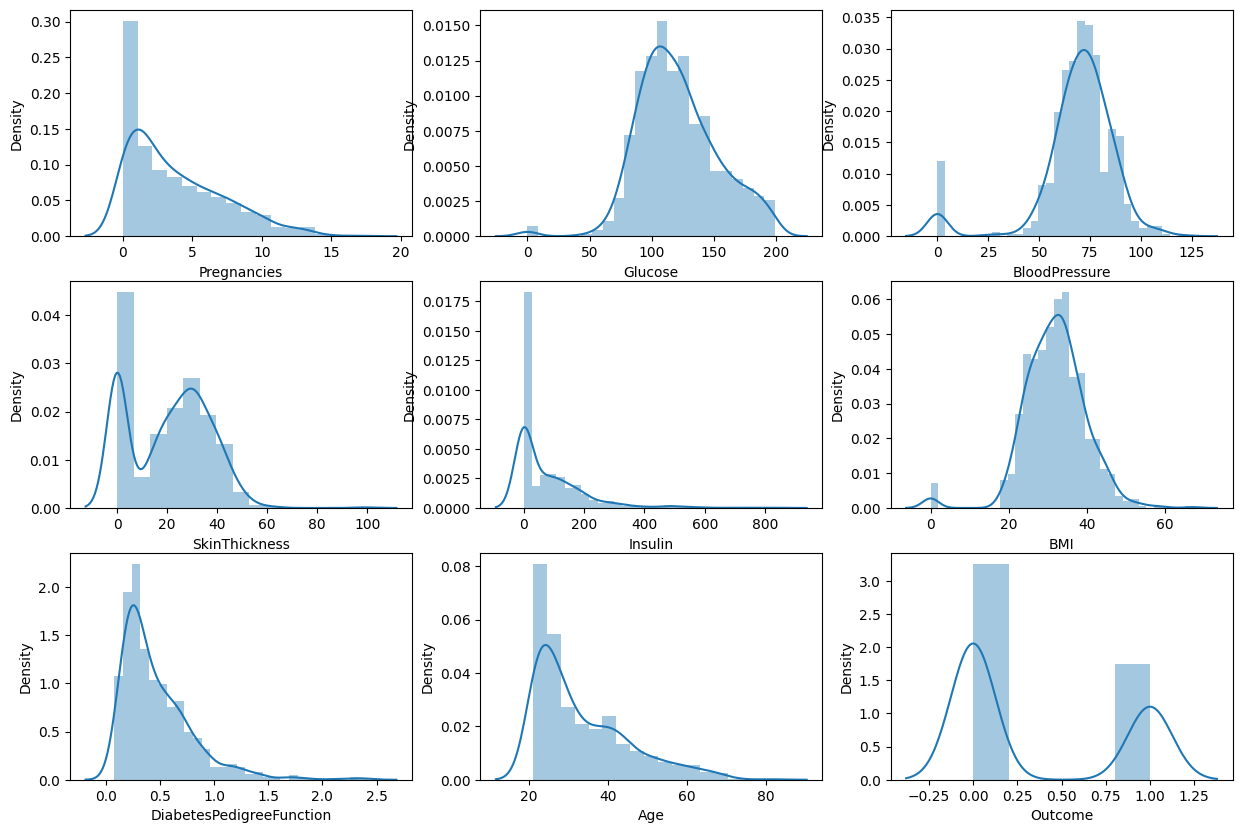

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))  # fig로 해도 동일한데, fig, axes로 왜 둘로 할당을 하는지?


# sns.distplot(df['Outcome'], ax=axes[0][0])  # ax 미지정시, 가장 마지막에 들어감
# enumerate로 for를 돌면, 인덱스값도 같이 출력됨

for i, col_name in enumerate(cols):
    row = i//3
    col = i % 3
    sns.distplot(df[col_name], ax = axes[row][col])


<ipython-input-38-55bb5113f3c2>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-38-55bb5113f3c2>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-38-55bb5113f3c2>:13: UserWarning: 

`distplot` 

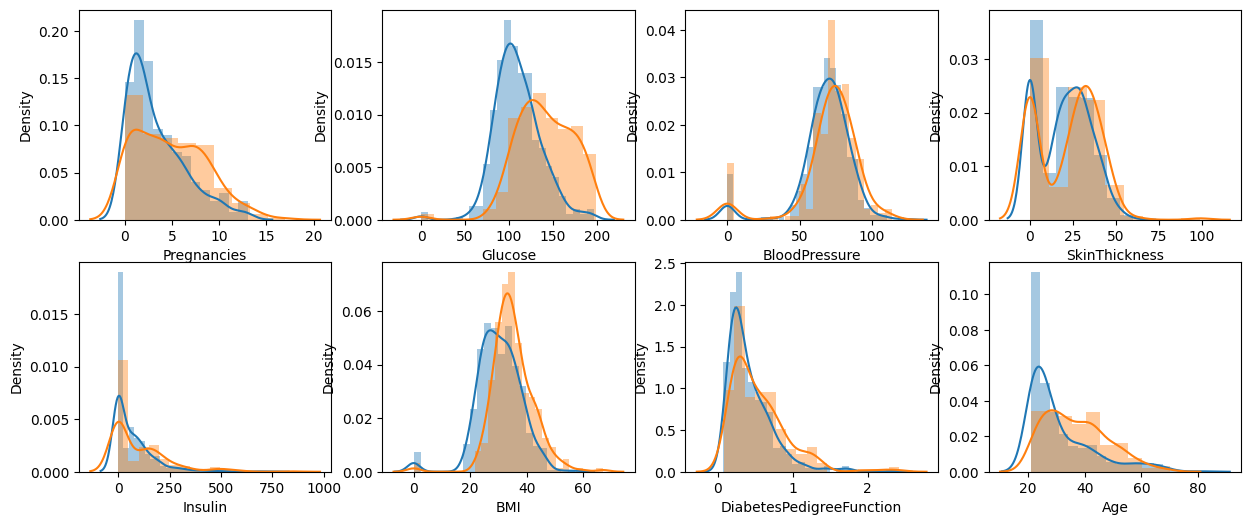

In [ ]:
# Outcome을 제외한 8개로 그림을 그릴것임
# subplots는 4*2형태로

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,6))

col_num = df.columns[:-2].shape

col_names = df.columns[:-2].tolist()

for i, col_name in enumerate(col_names):
    row = i //4
    col = i % 4
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

<ipython-input-39-cecb0f4a42ed>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])
<ipython-input-39-cecb0f4a42ed>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])
<ipython-input-39-cecb0f4a42ed>:10: UserWarning: 

`distplot` 

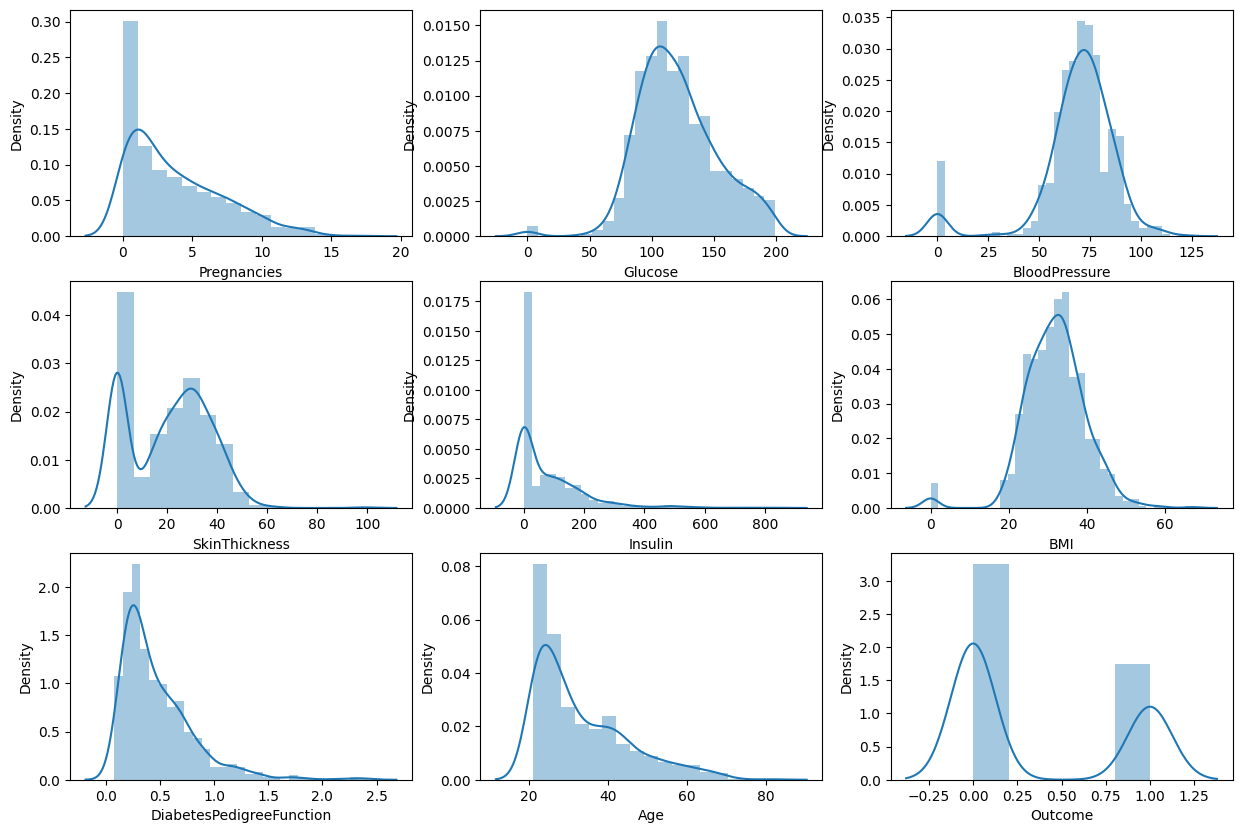

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))  # fig로 해도 동일한데, fig, axes로 왜 둘로 할당을 하는지?


# sns.distplot(df['Outcome'], ax=axes[0][0])  # ax 미지정시, 가장 마지막에 들어감
# enumerate로 for를 돌면, 인덱스값도 같이 출력됨

for i, col_name in enumerate(cols):
    row = i//3
    col = i % 3
    sns.distplot(df[col_name], ax = axes[row][col])


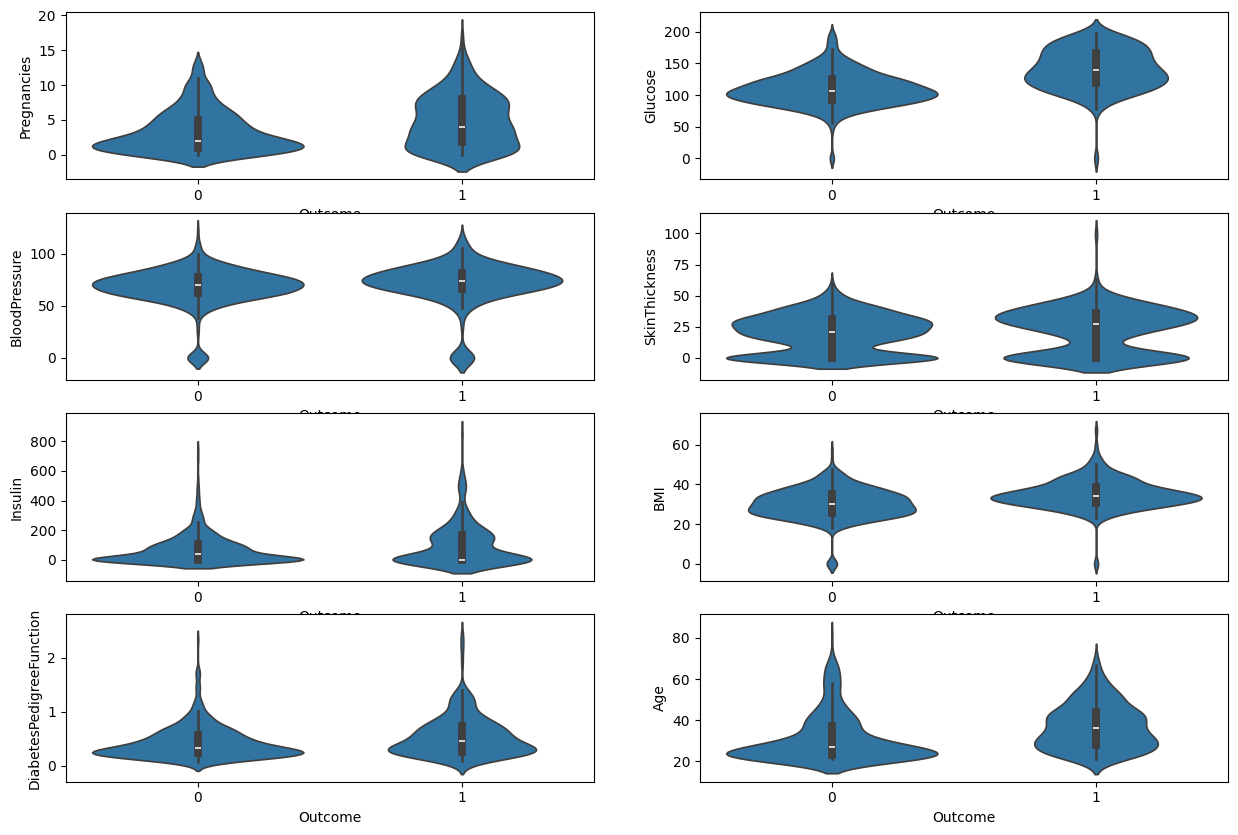

In [ ]:
# violinplot으로 subplot만들기

col_names = df.columns[:-1].tolist()
col_names

# subplot setting
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(15,10))

for i, col_name in enumerate(col_names[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data= df, x = "Outcome", y = col_name,  ax = axes[row][col])
    # print(i, col_name, row, col)

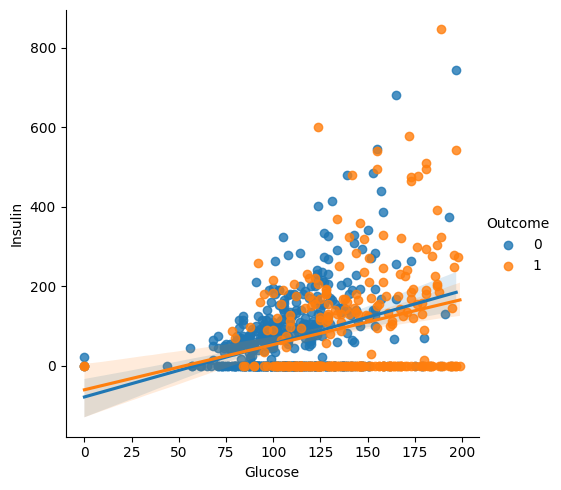

In [ ]:
sns.lmplot(data=df, x='Glucose', y='Insulin', hue = 'Outcome')

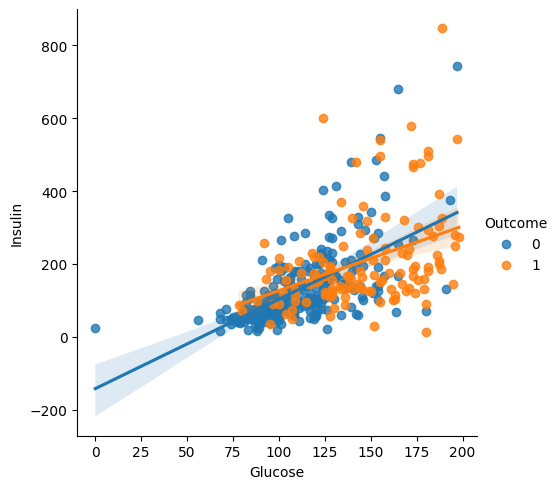

In [ ]:
sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue = 'Outcome')

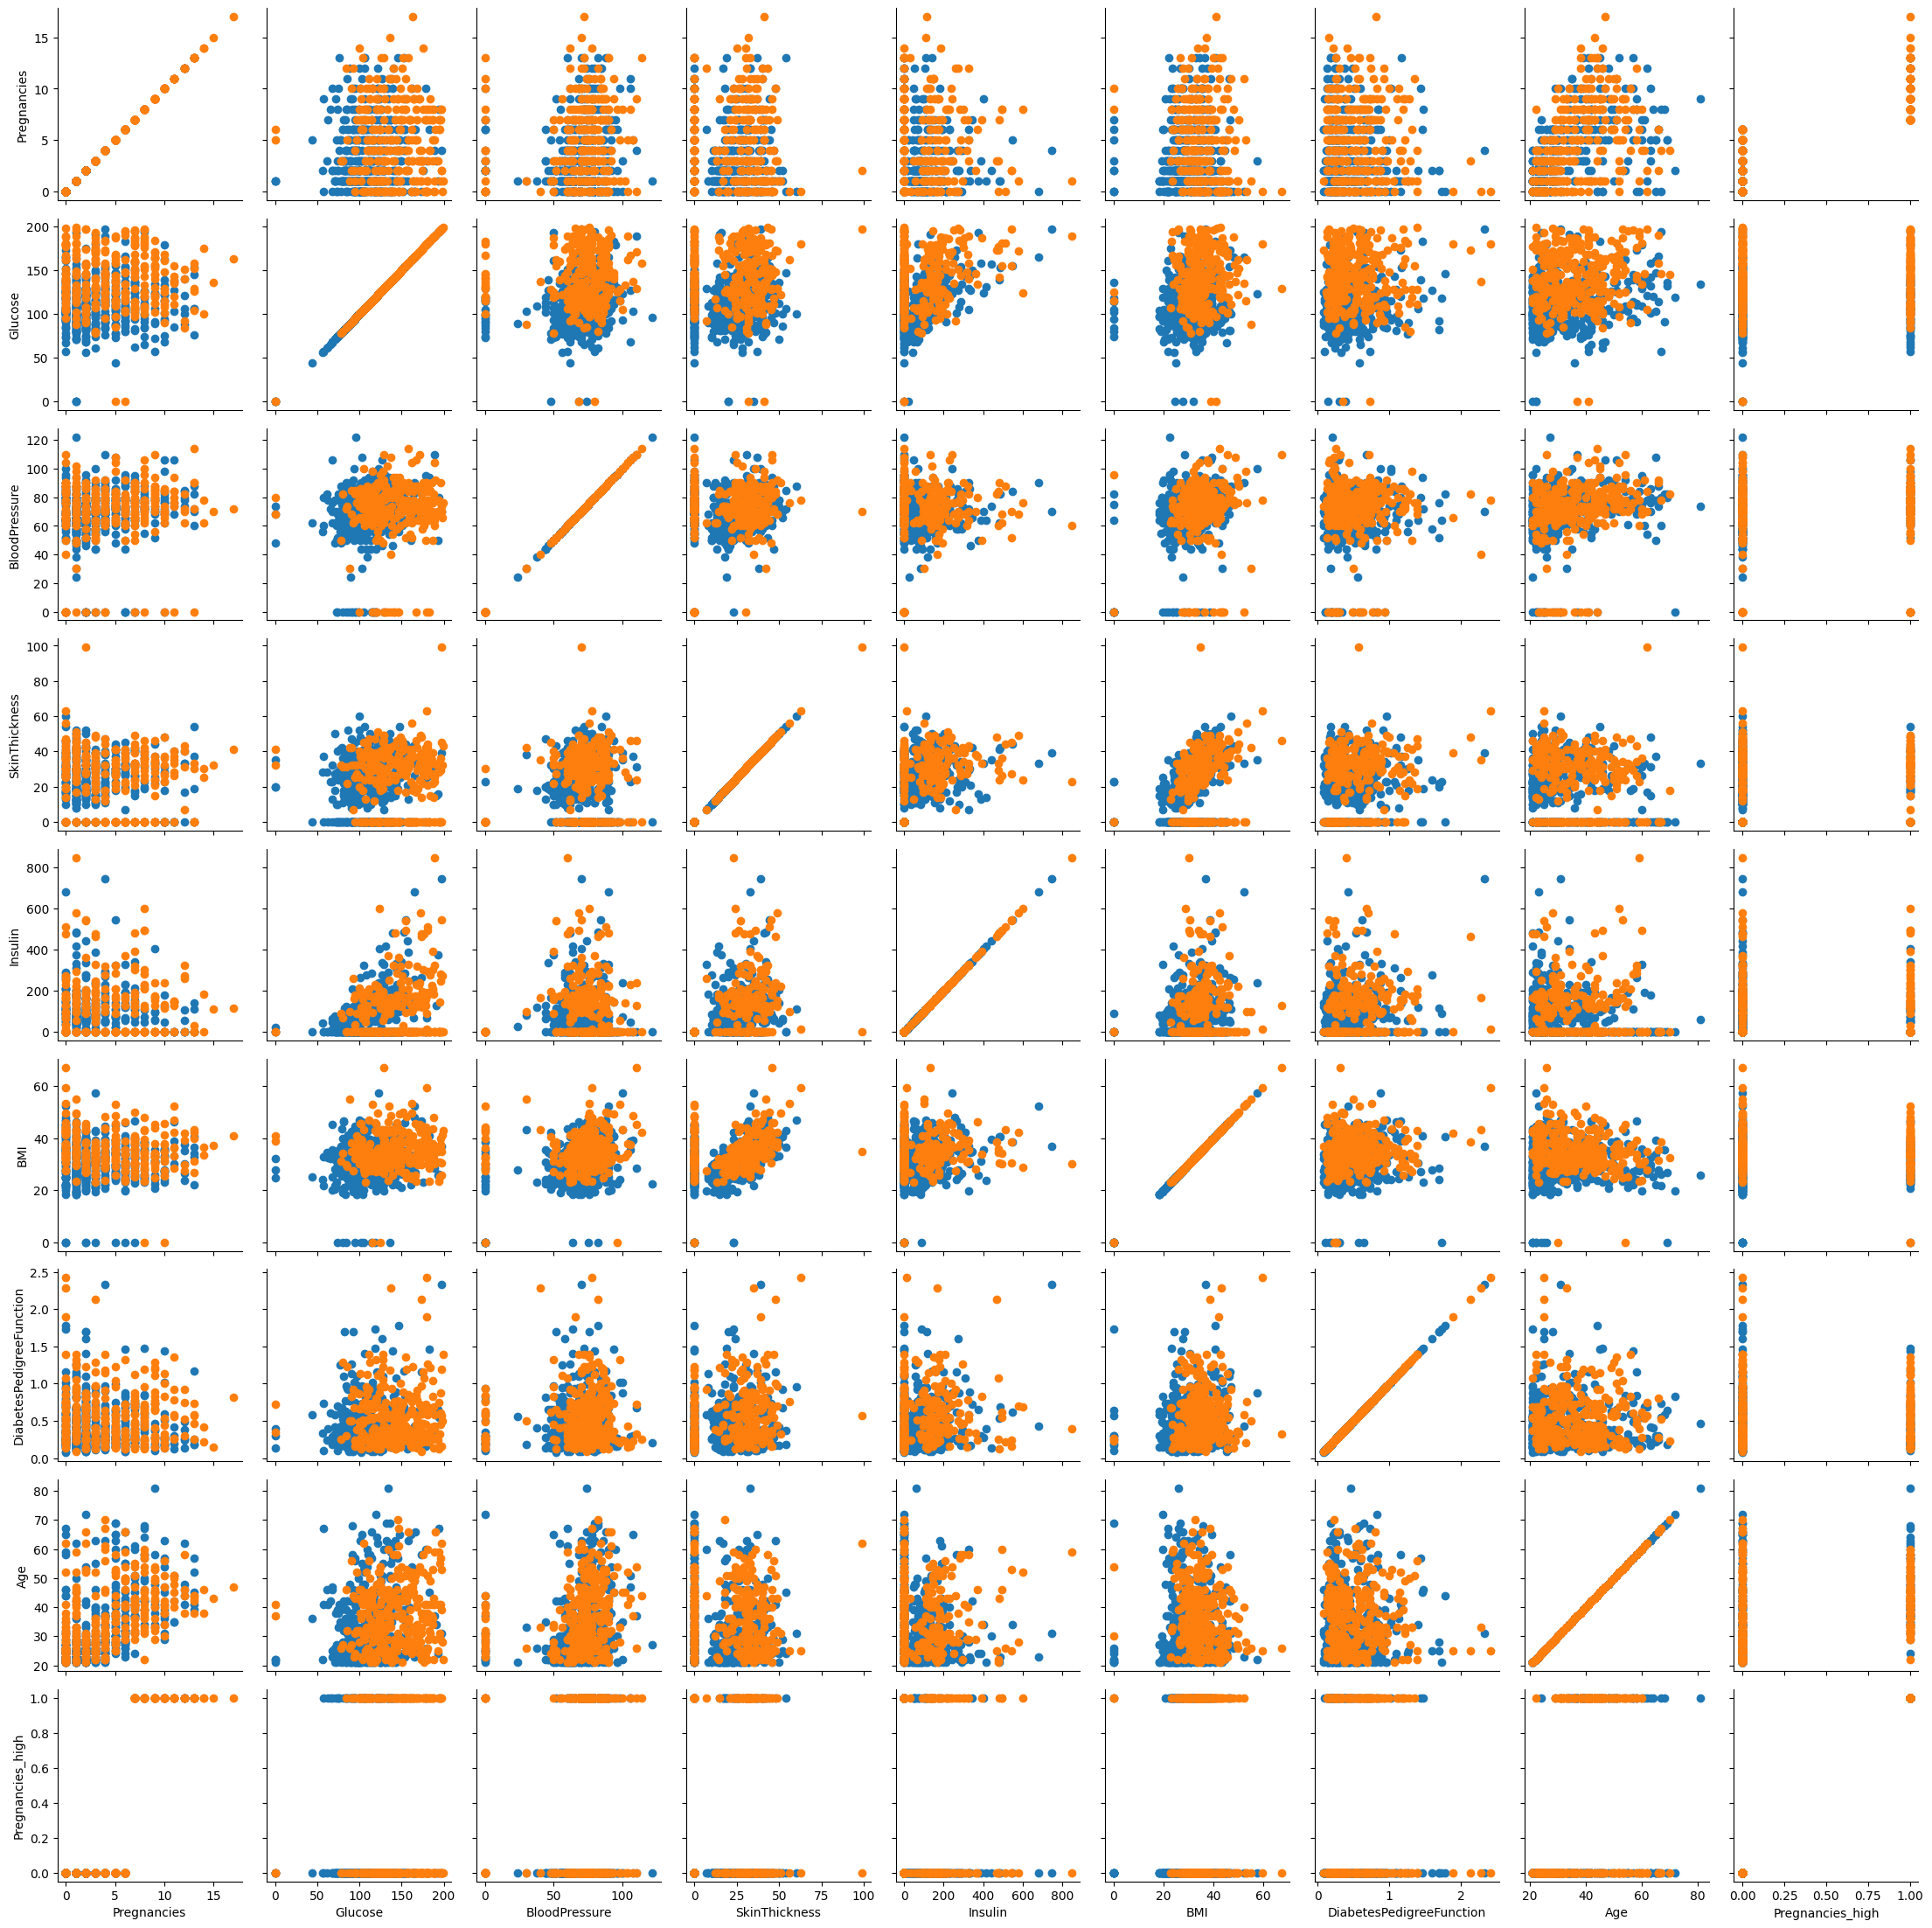

In [ ]:
g= sns.PairGrid(df, hue='Outcome')

g.map(plt.scatter)

In [ ]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<Axes: >

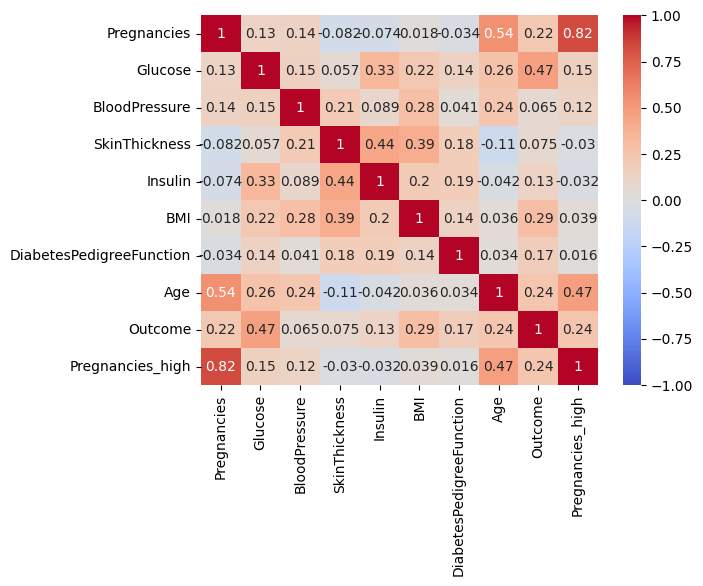

In [ ]:
sns.heatmap(df_corr, annot = True, vmax=1, vmin=-1, cmap='coolwarm')

In [ ]:
df_new = df.iloc[:,:-2].replace(0, np.nan)
df_new['Outcome'] = df['Outcome']
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
df_new_corr = df_new.corr()
df_new_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

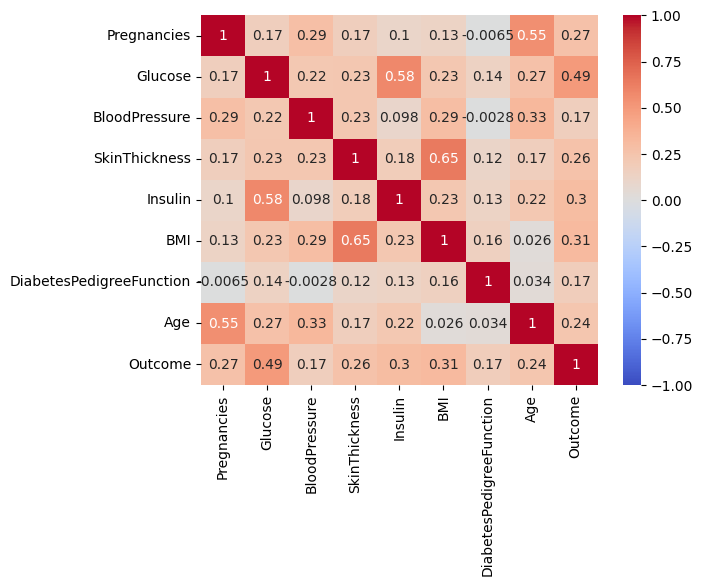

In [ ]:
sns.heatmap(df_new_corr, vmax=1, vmin=-1, cmap='coolwarm', annot=True)

<Axes: xlabel='Insulin', ylabel='Glucose'>

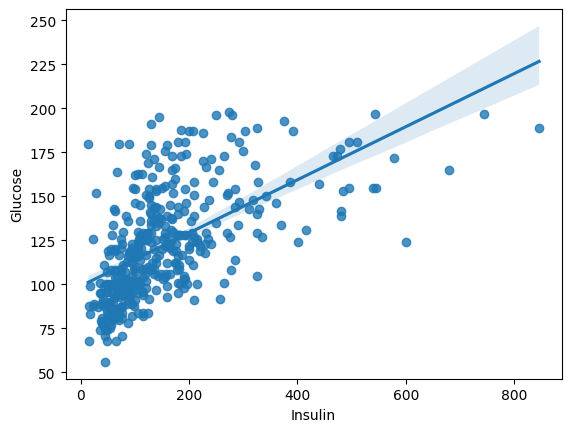

In [ ]:
# Insulin & Glucose on regplot

sns.regplot(data = df_new, x='Insulin', y = 'Glucose')

<Axes: xlabel='Age', ylabel='Pregnancies'>

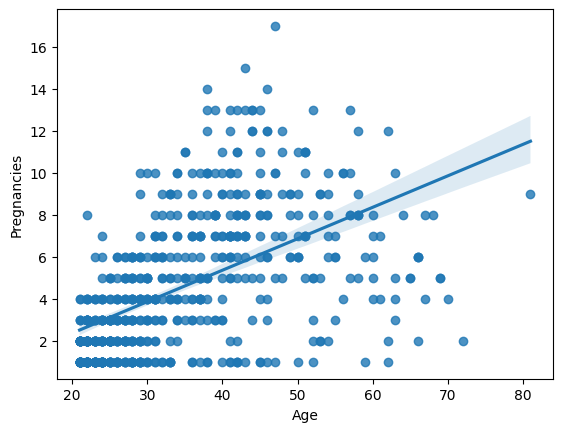

In [ ]:
# regplot with Age, Pregnancies

sns.regplot(data = df_new, x='Age', y ='Pregnancies' )

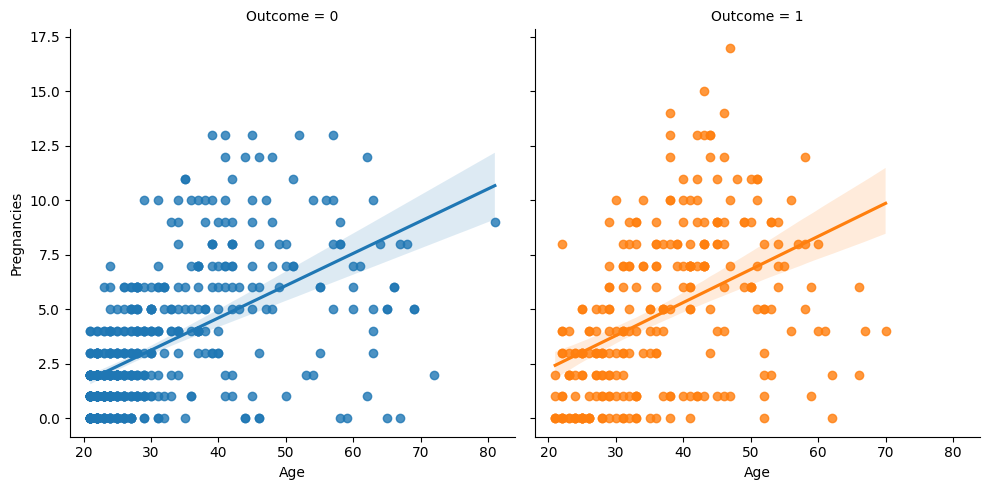

In [ ]:
sns.lmplot(data = df, x='Age', y = 'Pregnancies', hue='Outcome', col = 'Outcome')